Задание 1

Самостоятельно ознакомившись с тем, что такое автокорреляционная функция, рассчитайте и отобразите графически автокорреляционную функцию прямоугольного импульса: [np.zeros(8), np.ones(3), np.zeros(8)]. Напишите функцию, вычисляющую автокорреляцию.

In [ ]:
import matplotlib.pyplot as plt  # для вывода графиков
import pandas as pd
from scipy.fftpack import fft # для расчета FFT
import numpy as np  # для работы с массивами данных
from scipy import signal  # отсюда будем вытаскивать фильтры
import librosa  # для параметризации аудио
import librosa.display  # для отображения аудио сигналов
import IPython.display as ipd  # для проигрывания аудио в ноутбуке
import scipy  # библиотека научных вычислений
import seaborn as sn
from statsmodels.graphics.tsaplots import plot_acf
from scipy import signal

%matplotlib inline

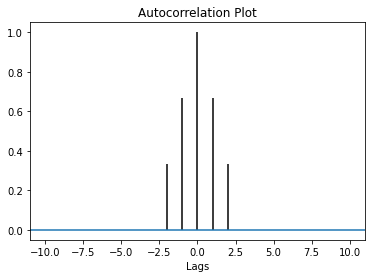

In [ ]:
a = np.zeros(8)                 # ГРАФИК КОРЕЛЛЯЦИИ ПРИ СМЕЩЕНИИ НА 2 ВРЕМЕННЫХ ИНТЕРВАЛА
b = np.ones(3)
c = np.zeros(8)
d = np.concatenate((a, b, c), axis=0)
plt.title("Autocorrelation Plot") 
plt.xlabel("Lags") 
plt.acorr(d,) 
plt.show()

In [ ]:
def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')
    result = r/(variance*n)
    return result

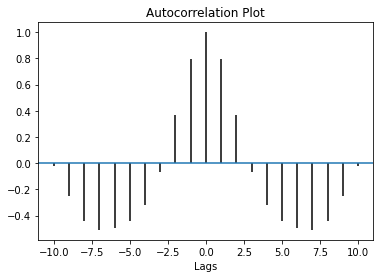

In [ ]:
a = np.zeros(8)
b = np.ones(3)
c = np.zeros(8)
x = np.concatenate((a, b, c), axis=0)
estimated_autocorrelation(x)
plt.title("Autocorrelation Plot") 
plt.xlabel("Lags") 
plt.acorr(estimated_autocorrelation(x),) 
plt.show()

Задание 2

Попробуйте подобрать другой тип сигнала (например, ЭКГ, временной ряд и т. д.) и сделать его преобразование Фурье. Выведите его спектрограмму и полученный после преобразования амплитудный спектр.



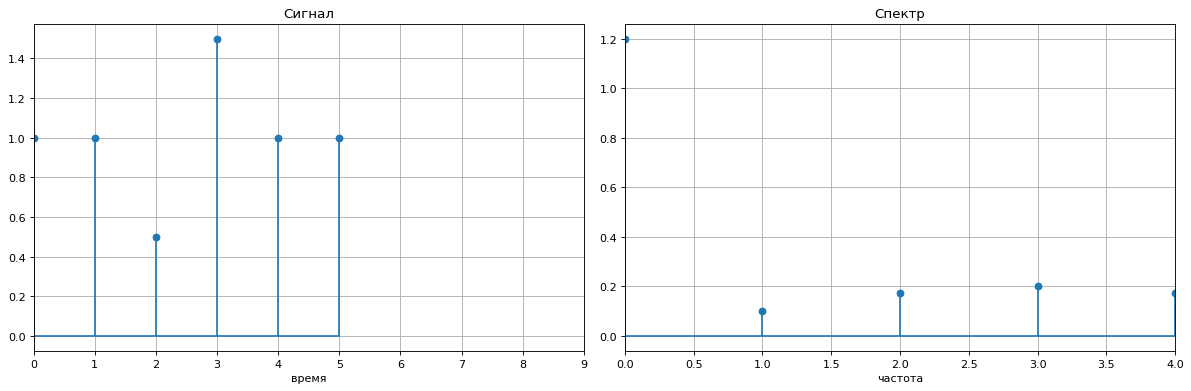

In [ ]:
N = 10
x = [1.0, 1.0, 0.5, 1.5, 1.0, 1.0]  #сигнал кардиограммы за 1 секунду
X = fft(x) #Выполняем преобразование Фурье
sr = 6
X = 2*np.abs(X) / N #Выводим амплитудную характеристику, нормализуем по N
 # Выводим результаты
fig = plt.figure(figsize=(15, 5), dpi=80)

# Отрисовка сигнала в дискретной форме                          # (ДЛЯ НАГЛЯДНОСТИ)
plt.subplot(1, 2, 1)
plt.title('Сигнал')
plt.stem(x, use_line_collection=True, basefmt='C0')
plt.xlim([0, N-1])
plt.xlabel('время')
plt.grid()

# Амплитудный спектр на графике
plt.subplot(1, 2, 2)
plt.title('Спектр')
plt.stem(X, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('частота')
plt.grid()
plt.tight_layout()


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=6
  n_fft, y.shape[-1]


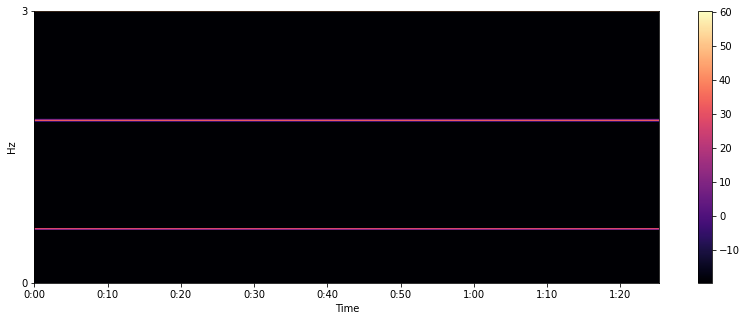

In [ ]:
x = np.array(x)
s = librosa.stft(x)
#Переводим спектр в децибелы
Xdb_mi = librosa.amplitude_to_db(abs(s))

#Выводим спектр на экран
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_mi, sr=sr, x_axis='time', y_axis='log') # y_axis='log'   y_axis='hz'
plt.colorbar()
plt.show()


Задание 3

Дан сложный сигнал, состоящий из 4-х гармонических компонент (синус) с различными значениями амплитуд и частот. Выведите спектр сигнала, на основе спектра определите частоты и амплитуды гармонических составляющих.

Сигнал (50 отсчетов): [ 0.00000000e+00, 6.61225969e+00, 3.25848078e+00, -1.20084548e+00, 3.45301249e+00, 8.94406332e+00, 4.69738850e+00, -1.36112077e+00, 2.18739790e+00, 8.35228095e+00, 5.25735866e+00, -1.07697134e+00, 1.30202985e+00, 6.87594476e+00, 3.25150704e+00, -4.69190350e+00, -3.88118391e+00, 2.10527395e+00, 3.66950398e-01, -6.14121684e+00, -4.38906614e+00, 3.21326193e+00, 3.07651304e+00, -3.62470149e+00, -3.41879558e+00, 3.41879558e+00, 3.62470149e+00, -3.07651304e+00, -3.21326193e+00, 4.38906614e+00, 6.14121684e+00, -3.66950398e-01, -2.10527395e+00, 3.88118391e+00, 4.69190350e+00, -3.25150704e+00, -6.87594476e+00, -1.30202985e+00, 1.07697134e+00, -5.25735866e+00, -8.35228095e+00, -2.18739790e+00, 1.36112077e+00, -4.69738850e+00, -8.94406332e+00, -3.45301249e+00, 1.20084548e+00, -3.25848078e+00, -6.61225969e+00, -1.78798433e-14]

In [ ]:
# цифровой сигнал
x = np.array( [ 0.00000000e+00, 6.61225969e+00, 3.25848078e+00, -1.20084548e+00, 3.45301249e+00, 8.94406332e+00, 4.69738850e+00, -1.36112077e+00, 2.18739790e+00, 8.35228095e+00, 5.25735866e+00, -1.07697134e+00, 1.30202985e+00, 6.87594476e+00, 3.25150704e+00, -4.69190350e+00, -3.88118391e+00, 2.10527395e+00, 3.66950398e-01, -6.14121684e+00, -4.38906614e+00, 3.21326193e+00, 3.07651304e+00, -3.62470149e+00, -3.41879558e+00, 3.41879558e+00, 3.62470149e+00, -3.07651304e+00, -3.21326193e+00, 4.38906614e+00, 6.14121684e+00, -3.66950398e-01, -2.10527395e+00, 3.88118391e+00, 4.69190350e+00, -3.25150704e+00, -6.87594476e+00, -1.30202985e+00, 1.07697134e+00, -5.25735866e+00, -8.35228095e+00, -2.18739790e+00, 1.36112077e+00, -4.69738850e+00, -8.94406332e+00, -3.45301249e+00, 1.20084548e+00, -3.25848078e+00, -6.61225969e+00, -1.78798433e-14])

#  FFT на 512 отсчетах
N = 19



/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=50
  n_fft, y.shape[-1]


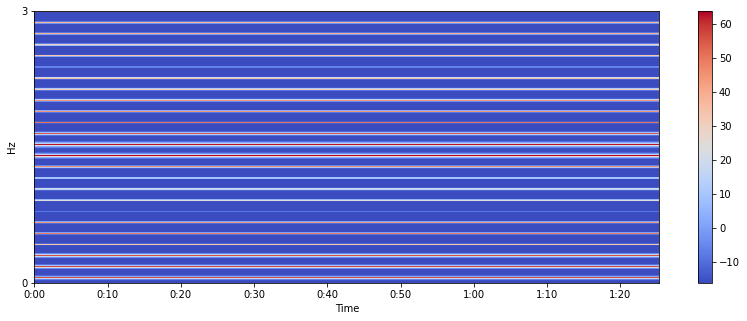

In [ ]:
s = librosa.stft(x)
#Переводим спектр в децибелы
Xdb_mi = librosa.amplitude_to_db(abs(s))

#Выводим спектр на экран
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_mi, sr=sr, x_axis='time', y_axis='log') # y_axis='log'   y_axis='hz'
plt.colorbar()
plt.show()

In [ ]:
X = fft(x) #Выполняем преобразование Фурье
X = 2*np.abs(X) / N

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=2048 is too small for input signal of length=50
  n_fft, y.shape[-1]


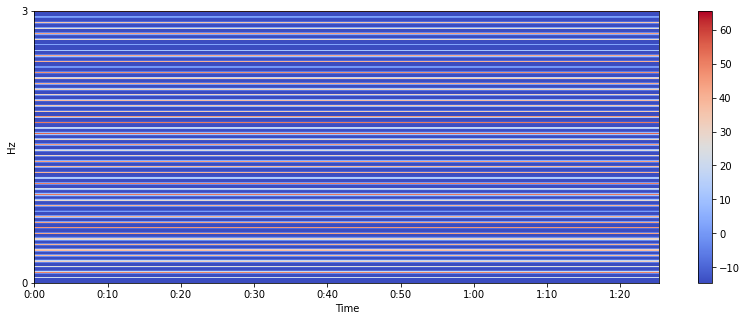

In [ ]:
s = librosa.stft(X)
#Переводим спектр в децибелы
Xdb_mi = librosa.amplitude_to_db(abs(s))

#Выводим спектр на экран
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_mi, sr=sr, x_axis='time', y_axis='log') # y_axis='log'   y_axis='hz'
plt.colorbar()
plt.show()

Задание 4

Загрузите аудиосигнал, сделайте все преобразования, которые есть в библиотеке  librosa в разделе Spectral features (https://librosa.org/doc/latest/feature.html). 

Возьмите среднее по всем преобразованиям, соедините все значения в один вектор так, чтобы на выходе у вас получился вектор размером 14.

In [ ]:
from google.colab import drive  # подключаем гугл диск к колабу для загрузки аудиофайлов
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_path = '/content/drive/My Drive/Audio.wav'
audio_path

'/content/drive/My Drive/Audio.wav'

In [ ]:
# Выбираем файл для примера
audio_path = '/content/drive/MyDrive/Audio.wav'
# Загружаем аудио
x, sr = librosa.load(audio_path)  # распаковываем в x-значения сигнала, sr-частота дискретизации(sample rate)
# Выводим данные по сигналу
print(type(x), type(sr))
print(x.shape, sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(109133,) 22050


In [ ]:
import IPython.display as ipd  # для проигрывания аудио
# Запускаем проигрывание
ipd.Audio(audio_path)

In [ ]:
x_notes, sr_notes = librosa.load(audio_path)
print(type(x_notes), type(sr_notes))
print(x_notes.shape, sr_notes)


/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(109133,) 22050


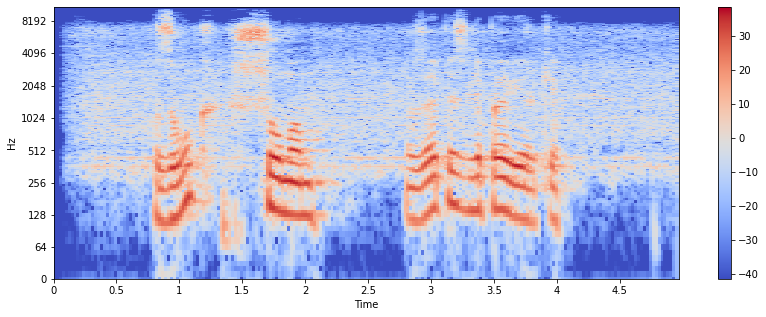

In [ ]:
# Рассчитываем спектр всех нот
X_notes = librosa.stft(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm1=X_notes.mean()


# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

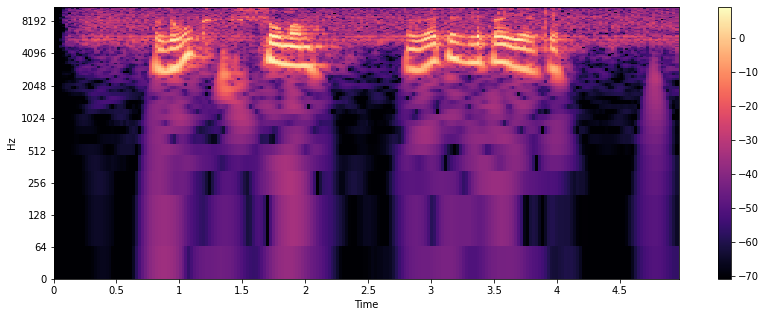

In [ ]:
# Рассчитываем хромаграмму постоянной добротности
X_notes = librosa.cqt(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm2=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

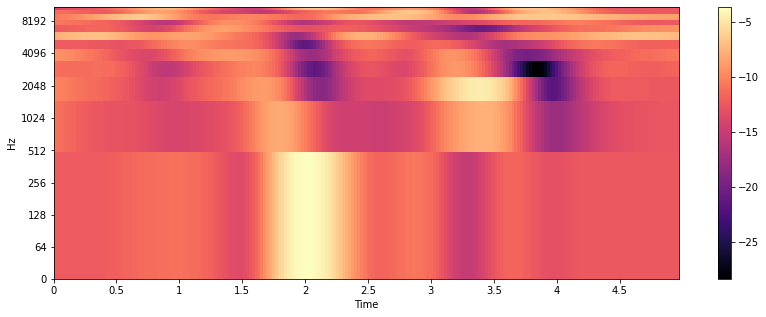

In [ ]:
# Вычисляем вариант цветности “Нормализованная энергия цветности” (CENS)

X_notes = librosa.feature.chroma_cens(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm3=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

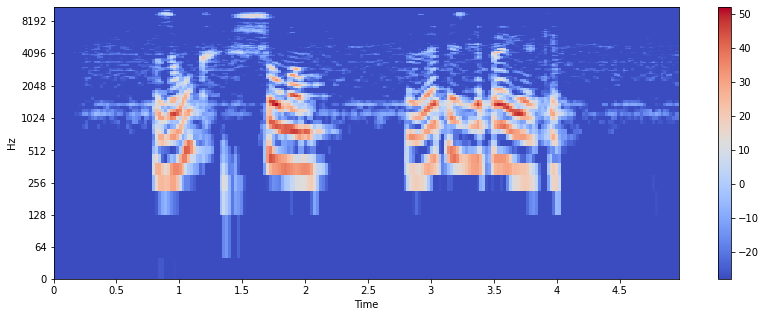

In [ ]:
# Вычислите спектрограмму в масштабе mel

X_notes = librosa.feature.melspectrogram(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm4=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

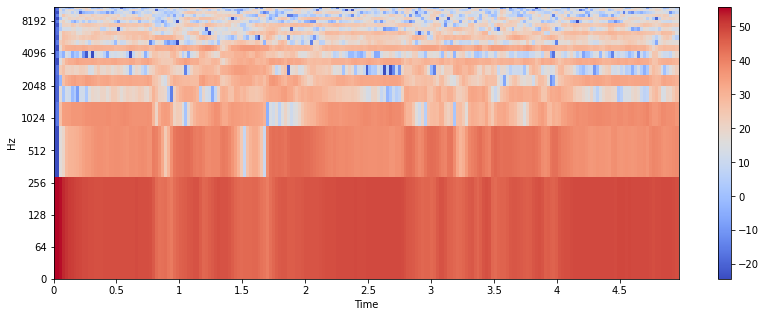

In [ ]:
# Mel-частотные кепстральные коэффициенты (MFCC)

X_notes = librosa.feature.mfcc(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm5=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

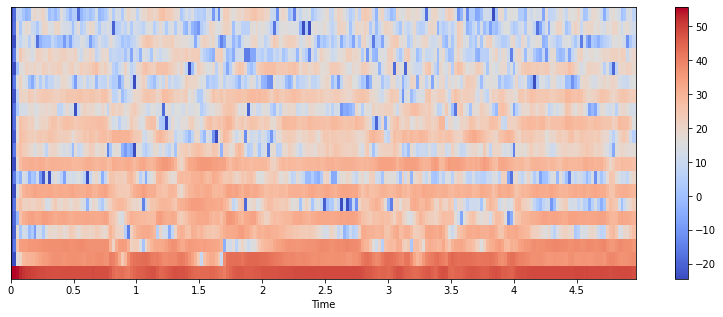

In [ ]:
# Вычислите среднеквадратичное (среднеквадратичное) значение для каждого кадра либо по звуковым образцамy, либо по спектрограмме 

X_notes = librosa.magphase(librosa.stft(x_notes))
rms = librosa.feature.rms(x_notes)
xm6 = rms.mean()


# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

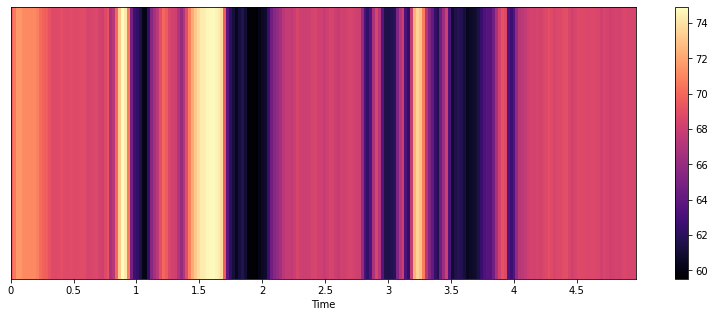

In [ ]:
# Вычислите спектральный центроид.

X_notes = librosa.magphase(librosa.stft(x_notes))
X_notes = librosa.feature.spectral_centroid(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm7=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

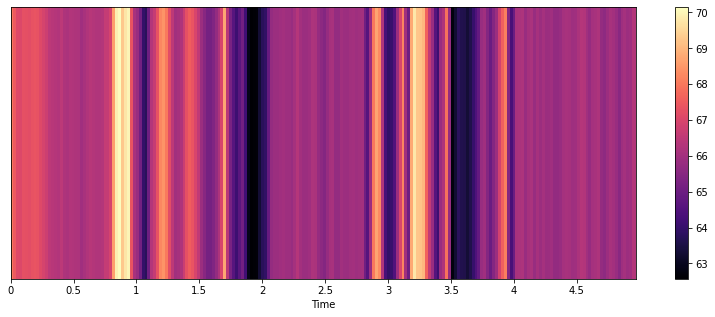

In [ ]:
# Вычислите спектральную полосу пропускания p-го порядка.

X_notes = librosa.magphase(librosa.stft(x_notes))
X_notes = librosa.feature.spectral_bandwidth(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm8=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

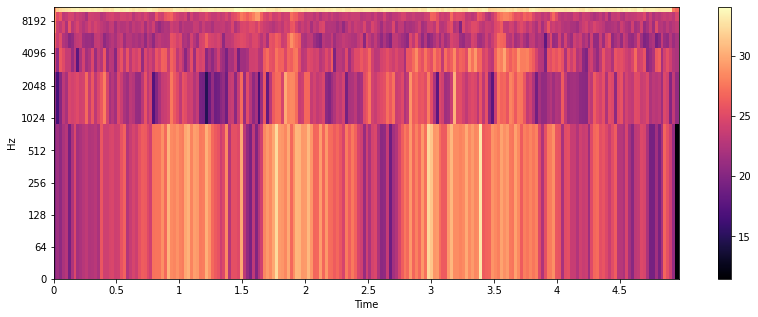

In [ ]:
# Вычислить спектральный контраст

X_notes = librosa.feature.spectral_contrast(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm9=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

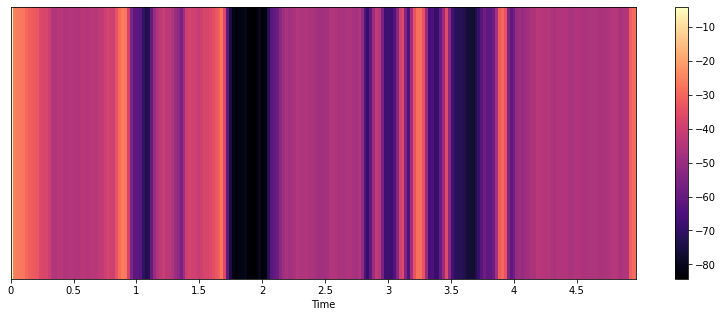

In [ ]:
# Вычислите спектральную плоскостность

X_notes = librosa.magphase(librosa.stft(x_notes))
X_notes = librosa.feature.spectral_flatness(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm10=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

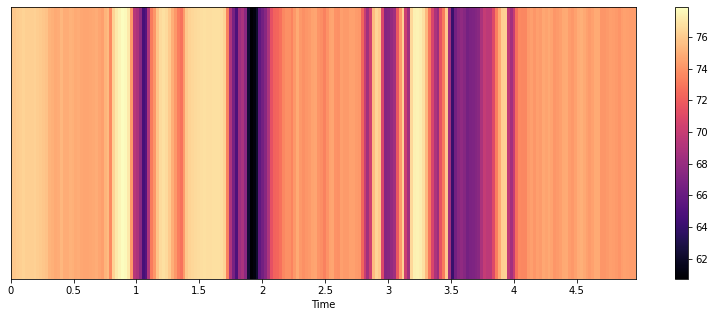

In [ ]:
# Вычислите частоту отката.

X_notes = librosa.magphase(librosa.stft(x_notes))
X_notes = librosa.feature.spectral_rolloff(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm11=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

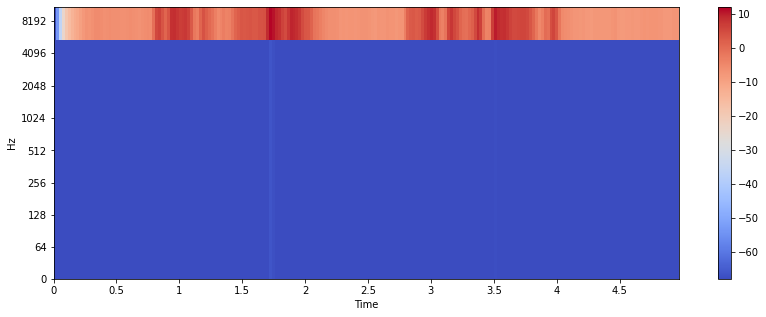

In [ ]:
# Получите коэффициенты подгонки полинома n-го порядка к столбцам спектрограммы.

X_notes = librosa.feature.poly_features(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm12=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

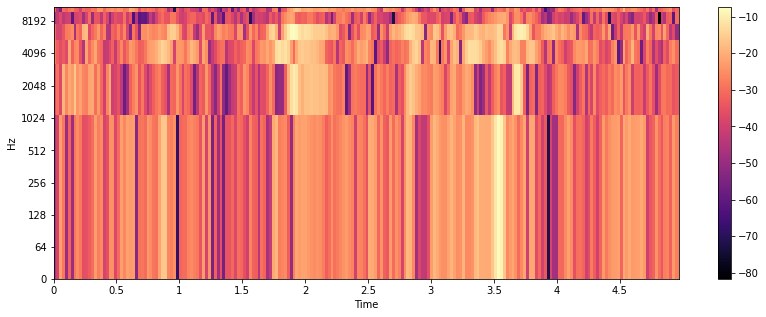

In [ ]:
# Вычисляет функции тонального центроида (тоннец)

X_notes = librosa.feature.tonnetz(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm13=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time', y_axis= 'log') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

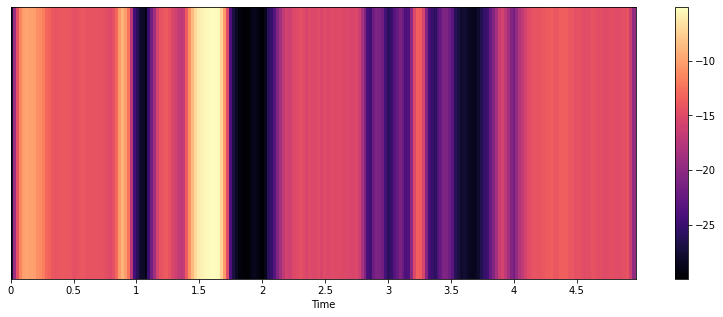

In [ ]:
# Вычислите скорость пересечения нуля звукового временного ряда.


X_notes = librosa.load(librosa.ex('trumpet'))
X_notes = librosa.feature.zero_crossing_rate(x_notes)
Xdb_notes = librosa.amplitude_to_db(abs(X_notes))
xm14=X_notes.mean()

# Отображаем спектр
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb_notes, sr=sr_notes, x_axis='time') #y_axis='log'  'hz'
plt.colorbar()
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


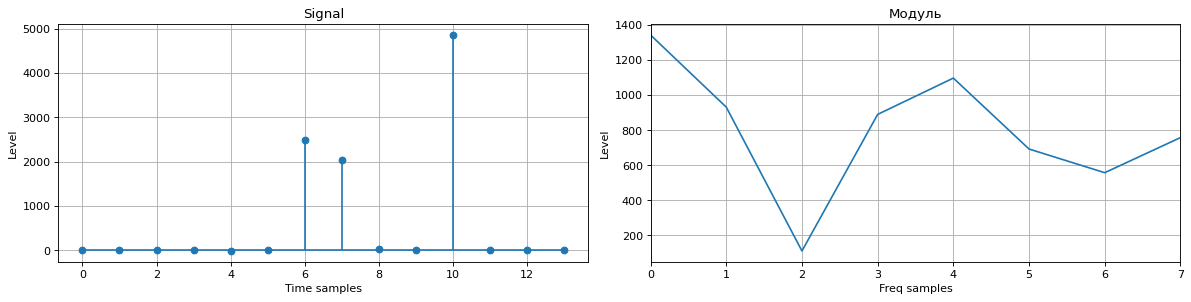

In [ ]:
# цифровой сигнал
x = (xm1,xm2,xm3,xm4,xm5,xm6,xm7,xm8,xm9,xm10,xm11,xm12,xm13,xm14)
t = librosa.times_like(X_notes)
N = 14

xA = np.abs(fft(x))*2/N

# Список графиков
xT = [x, xA]
lst_title = ['Signal', u'Модуль']

# Выводим результаты
fig = plt.figure(figsize=(15, 7), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N//2])
    plt.grid()
plt.tight_layout()

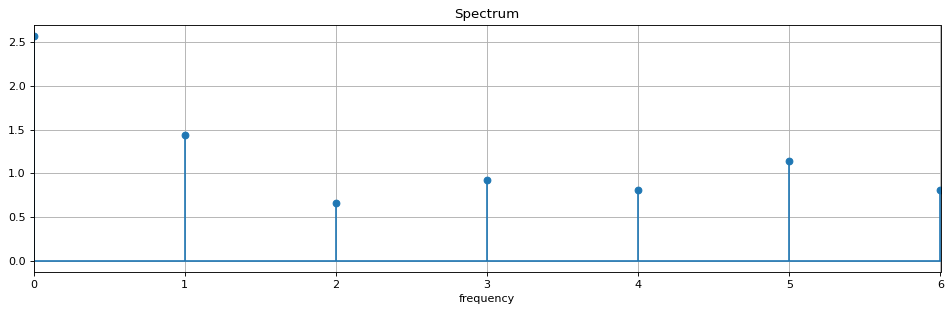

In [ ]:
signal =  [5,3,0,0,0,-1,3, 3, 5, 0]
# Рассчитываем FFT аудио сигнала
Y = fft(signal)
N = 14
Y = 2*np.abs(Y) / N  # выводим амплитудную характеристику, нормализуем по N

# Выводим результаты
fig = plt.figure(figsize=(12, 4), dpi=80)

# Частотный спектр
plt.title('Spectrum')
plt.stem(Y, use_line_collection=True, basefmt='C0')
plt.xlim([0, N//2-1])
plt.xlabel('frequency')
plt.grid()
plt.tight_layout()

In [ ]:
signal.dtype

dtype('float64')

In [ ]:
N = 14 # Зададим количество отсчетов
t = librosa.times_like(X_notes)
# цифровой сигнал
#x = (librosa.stft(x_notes).mean, librosa.cqt(x_notes).mean(), librosa.feature.chroma_cens(x_notes).mean(), librosa.feature.melspectrogram(x_notes).mean(), librosa.feature.mfcc(x_notes).mean(), librosa.feature.rms(x_notes).mean(), librosa.feature.spectral_centroid(x_notes).mean(), librosa.feature.spectral_bandwidth(x_notes).mean(), librosa.feature.spectral_contrast(x_notes).mean(), librosa.feature.spectral_flatness(x_notes).mean(), librosa.feature.spectral_rolloff(x_notes).mean(), librosa.feature.poly_features(x_notes).mean(), librosa.feature.tonnetz(x_notes).mean(), librosa.feature.zero_crossing_rate(x_notes).mean())
#x = ((librosa.stft(x_notes), librosa.cqt(x_notes), librosa.feature.chroma_cens(x_notes), librosa.feature.melspectrogram(x_notes), librosa.feature.mfcc(x_notes), librosa.feature.rms(x_notes), librosa.feature.spectral_centroid(x_notes), librosa.feature.spectral_bandwidth(x_notes), librosa.feature.spectral_contrast(x_notes), librosa.feature.spectral_flatness(x_notes), librosa.feature.spectral_rolloff(x_notes), librosa.feature.poly_features(x_notes), librosa.feature.tonnetz(x_notes), librosa.feature.zero_crossing_rate(x_notes).mean())

#xn = float(x)
xn = map(float, x)

xA = np.abs(fft(x))*2/N

# Список графиков
xT = [x]
lst_title = ['Модуль']

# Выводим результаты
fig = plt.figure(figsize=(15, 5), dpi=80)
for i, sig in enumerate(xT):
    plt.subplot(2, 2, int(2**i))
    plt.ylabel('Level')
    plt.title(lst_title[i])
    if i == 0:
        plt.stem(sig, use_line_collection=True, basefmt='C0')
        plt.xlabel('Time samples')
    else:
        plt.plot(sig)
        plt.xlabel('Freq samples')
        plt.xlim([0, N//2])
    plt.grid()
plt.tight_layout()

In [ ]:
x

Задание 5

Загрузите аудиосигнал длиной до 10 секунд и отобразите его с помощью waveplot. Найдите в сигнале участки, где есть минимальные амплитуды (или там, где есть паузы) и удалите их. Оставшийся сигнал запишите в новый файл. Он должен стать короче по длине (не 10 секунд, а, например, 7 секунд). 

In [ ]:
from google.colab import drive  # подключаем гугл диск к колабу для загрузки аудиофайлов
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
audio_path = '/content/drive/My Drive/Audio.wav'
audio_path

'/content/drive/My Drive/Audio.wav'

In [ ]:
# Выбираем файл для примера
audio_path = '/content/drive/MyDrive/Audio.wav'
# Загружаем аудио
x, sr = librosa.load(audio_path)  # распаковываем в x-значения сигнала, sr-частота дискретизации(sample rate)
# Выводим данные по сигналу
print(type(x), type(sr))
print(x.shape, sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(109133,) 22050


In [ ]:
import IPython.display as ipd  # для проигрывания аудио
# Запускаем проигрывание
ipd.Audio(audio_path)

In [ ]:
apl = 109133/sr
print ("Продолжительность воспроизведения составляет ", apl, " секунд")

Продолжительность воспроизведения составляет  4.949342403628118  секунд


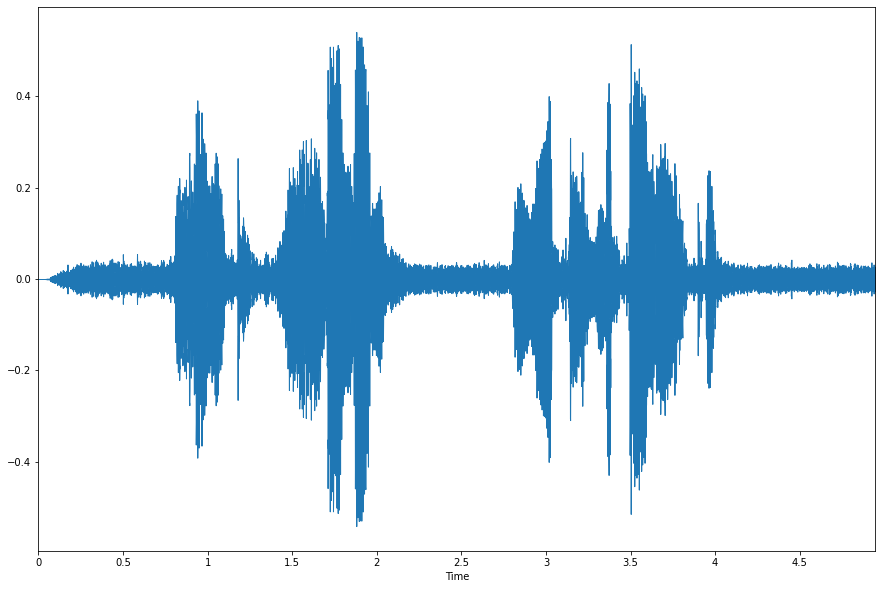

In [ ]:
# Выводим сигнал на экран
plt.figure(figsize=(15, 10))
librosa.display.waveplot(x, sr=sr)
plt.show()

In [ ]:
# Выбираем файл для примера
audio_path = '/content/drive/MyDrive/Audio.wav'
# Загружаем аудио
x, sr = librosa.load(audio_path)  # распаковываем в x-значения сигнала, sr-частота дискретизации(sample rate)
new_x = [i for i in x if i>=0.007 or i<=0]
new_x=np.array(new_x)
new_x.shape
x = new_x.copy()

# Выводим данные по сигналу
print(type(x), type(sr))
print(x.shape, sr)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


<class 'numpy.ndarray'> <class 'int'>
(92653,) 22050


In [ ]:
sr = 22050 # частота дискретизации
T = 3.7   # секунды
t = np.linspace(0, T, int(T*sr), endpoint=False) # переменная времени
x = x # чистая синусоидная волна при 220 Гц
# проигрывание аудио
ipd.Audio(x, rate=sr) # загрузка массива NumPy
# сохранение аудио
#sfdata, samplerate = sf.read('Audio.wav')
sf.write('new_audio.wav', x, sr, 'PCM_24')



In [ ]:
# Выбираем файл для примера
audio_pathnew = '/content/new_audio.wav'
# Загружаем аудио
x, sr = librosa.load(audio_pathnew)  # распаковываем в x-значения сигнала, sr-частота дискретизации(sample rate)


# Выводим данные по сигналу
print(type(x), type(sr))
print(x.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(92653,) 22050


In [ ]:
apl = 92653/sr
print ("Продолжительность воспроизведения составляет ", apl, " секунд")

Продолжительность воспроизведения составляет  4.201950113378685  секунд


In [ ]:
import IPython.display as ipd  # для проигрывания аудио
# Запускаем проигрывание
ipd.Audio(audio_pathnew)

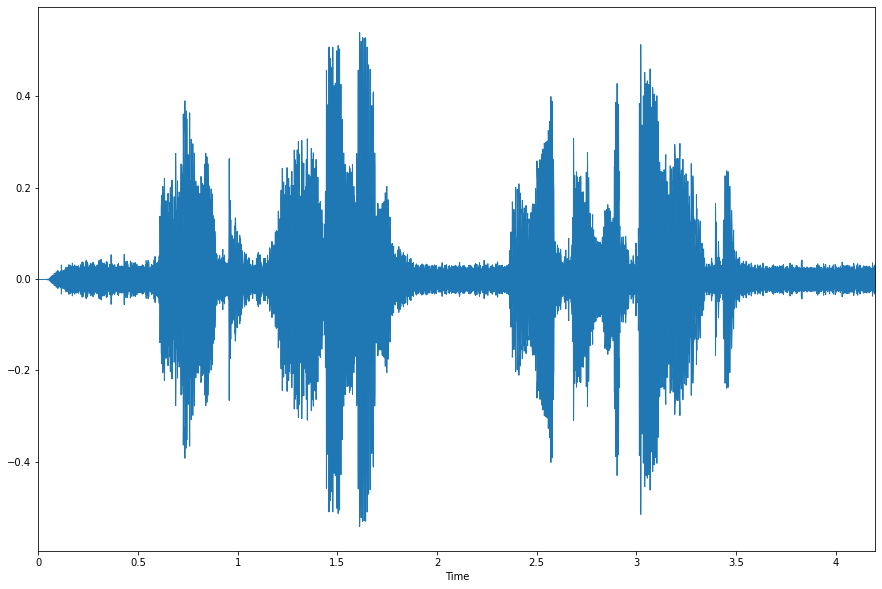

In [ ]:
# Выводим сигнал на экран
plt.figure(figsize=(15, 10))
librosa.display.waveplot(x, sr=sr)
plt.show()